In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,8)})
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy.stats import shapiro, chi2_contingency, mannwhitneyu

In [3]:
df = pd.read_csv("data/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
def convert_types(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Converts categorical variables to their appropriate type
    Arguments:
        df is a n-by-d pandas data frame
    Returns:
        the final dataframe with corrected categorical data types
    '''

    df_copy = df.copy(deep=True)
    df_copy['blue'] = df.blue.astype('category')
    df_copy['dual_sim'] = df.dual_sim.astype('category')
    df_copy['four_g'] = df.four_g.astype('category')
    df_copy['three_g'] = df.three_g.astype('category')
    df_copy['touch_screen'] = df.touch_screen.astype('category')
    df_copy['wifi'] = df.wifi.astype('category')
    return df_copy

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'clock_speed'}>],
       [<AxesSubplot:title={'center':'dual_sim'}>,
        <AxesSubplot:title={'center':'fc'}>,
        <AxesSubplot:title={'center':'four_g'}>],
       [<AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>,
        <AxesSubplot:title={'center':'mobile_wt'}>],
       [<AxesSubplot:title={'center':'n_cores'}>,
        <AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'px_height'}>],
       [<AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>],
       [<AxesSubplot:title={'center':'sc_w'}>,
        <AxesSubplot:title={'center':'talk_time'}>,
        <AxesSubplot:title={'center':'three_g'}>],
       [<AxesSubplot:title={'center':'touch_screen'}>,
        <AxesSubplot:title={'center':'wifi'}

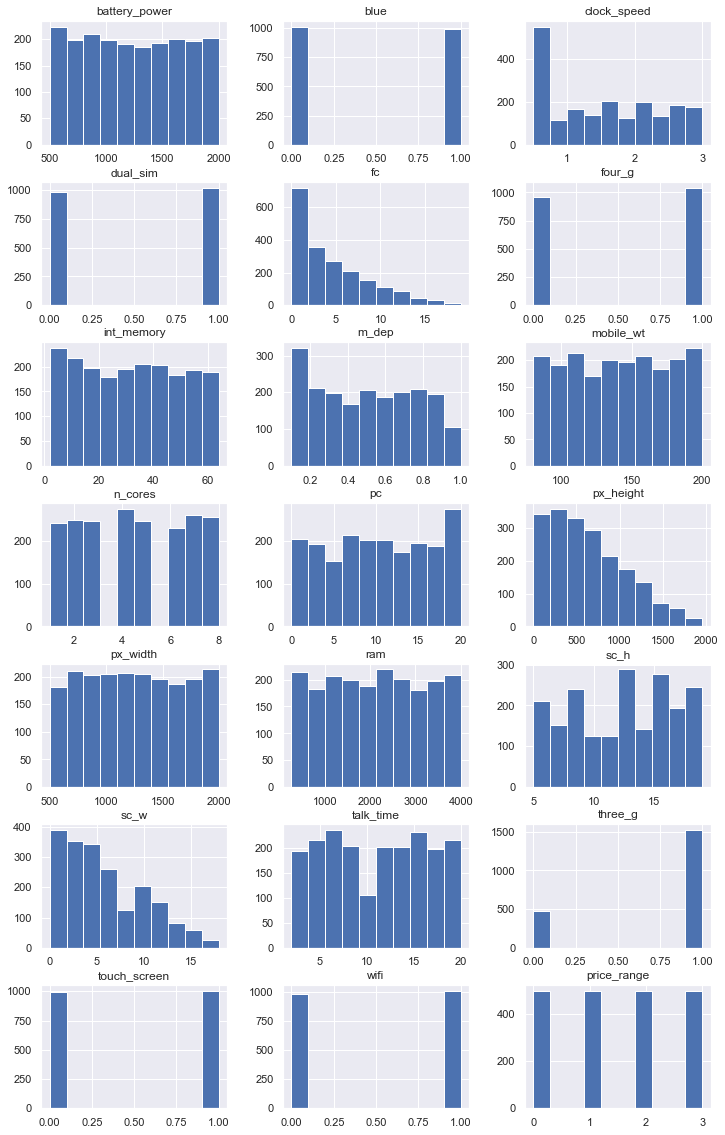

In [7]:
df.hist(layout=(7, 3), figsize=(12, 20))

#### Correlation Analysis

<AxesSubplot:>

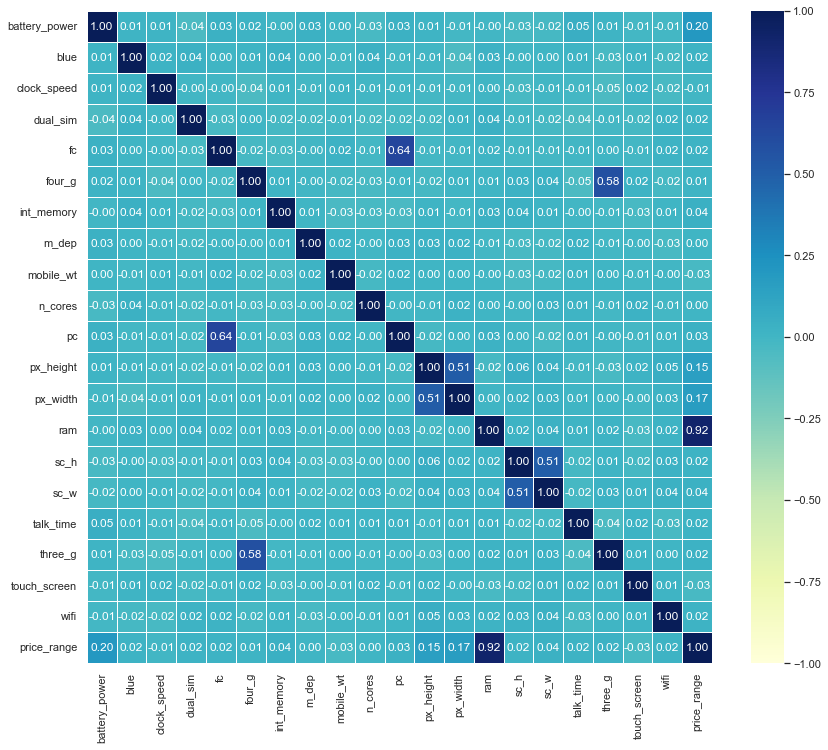

In [7]:
df_corr = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(df_corr, annot=True, linewidths=.5, cmap="YlGnBu", vmin=-1, vmax=1, fmt='.2f')

In [8]:
df_corr['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [9]:
def calc_skewness(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Calculates skewness and kurtosis of numeric features in the dataframe
    Arguments:
        df is a n-by-d pandas data frame
    Returns:
        result of skewness and kurtosis of each variable in the dataset as a pandas dataframe
    '''

    skew, kurtosis, num_features = [], [], []
    for feature in df.columns:
        if df[feature].dtype.name != 'category':
            num_features.append(feature)
            skew.append(round(df[feature].skew(), 2))
            kurtosis.append(round(df[feature].kurtosis(), 2))

    skew_analysis = pd.DataFrame(data={
        'skewness': skew,
        'kurtosis': kurtosis
    }, index=num_features)

    return skew_analysis

calc_skewness(df)

,skewness,kurtosis
battery_power,0.03,-1.22
blue,0.02,-2.00
clock_speed,0.18,-1.32
dual_sim,-0.04,-2.00
fc,1.02,0.28
four_g,-0.09,-1.99
int_memory,0.06,-1.22
m_dep,0.09,-1.27
mobile_wt,0.01,-1.21
n_cores,0.00,-1.23


### Hypothesis Testing

##### Normality test - Shapiro Wilk test

- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [11]:
for col in df.columns:
    stats, p = shapiro(df[col])
    print(col, end=':    ')
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

battery_power:    Probably not Gaussian
blue:    Probably not Gaussian
clock_speed:    Probably not Gaussian
dual_sim:    Probably not Gaussian
fc:    Probably not Gaussian
four_g:    Probably not Gaussian
int_memory:    Probably not Gaussian
m_dep:    Probably not Gaussian
mobile_wt:    Probably not Gaussian
n_cores:    Probably not Gaussian
pc:    Probably not Gaussian
px_height:    Probably not Gaussian
px_width:    Probably not Gaussian
ram:    Probably not Gaussian
sc_h:    Probably not Gaussian
sc_w:    Probably not Gaussian
talk_time:    Probably not Gaussian
three_g:    Probably not Gaussian
touch_screen:    Probably not Gaussian
wifi:    Probably not Gaussian
price_range:    Probably not Gaussian


##### Correlation test - chi-squared test

Tests whether two categorical variables are related or independent.

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

In [5]:
df = convert_types(df)

In [22]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['four_g'], df['three_g']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=679.944, p=0.000
Probably dependent


In [23]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['four_g'], df['dual_sim']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.010, p=0.922
Probably independent


##### Nonparametric Statistical Hypothesis test - Mann-Whitney U Test

Tests whether the distributions of two independent samples are equal or not.

- H0: the distributions of both samples are equal.
- H1: the distributions of both samples are not equal.

In [9]:
stat, p = mannwhitneyu(df['fc'], df['clock_speed'])
print(stat, p)
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

2605106.0 6.82068790232562e-62
Probably different distributions


In [8]:
stat, p = mannwhitneyu(df['battery_power'], df['px_width'])
print(stat, p)
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

1965063.5 0.3387476636437099
Probably the same distribution
